In [22]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, concatenate_datasets

mod_tax = 10
mod_order = 5
train_size = 0.7
test_size = 0.2 
val_size = 0.1

## create Dataset

In [2]:
dataset = load_dataset("/home/sebastian/Documents/Hauptprojekt/Daten_sorted")

KeyboardInterrupt: 

In [ ]:
dataset

In [2]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}

train_datasets, test_datasets = [], []

In [ ]:
def check_label(examples, label_index):
    booleans = []
    for label in examples['label']:
        try:
            if label == label_index:
                booleans.append(True)
            else:
                booleans.append(False)
        except:
            booleans.append(False)

    return booleans

# for each class: filter the dataset on documents with that class
# and then use the first 10 for training, and the last 10 for testing
for id in id2label.keys():
    # filter dataset on particular label
    filtered_dataset = dataset.filter(check_label, fn_kwargs={'label_index':id}, batched=True)
    
    if id == 2:
        mod5len = int(filtered_dataset["train"].num_rows*(1/mod_order))            
        mod5trainlen = int(mod5len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod5trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod5trainlen, int(mod5len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod5trainlen)
                      
    elif id == 7:
        mod10len = int(filtered_dataset["train"].num_rows*(1/mod_tax))
        mod10trainlen = int(mod10len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod10trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod10trainlen, int(mod10len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod10trainlen)
    else:    
        trainlen = int(filtered_dataset["train"].num_rows*train_size)
        totallen = int(filtered_dataset["train"].num_rows)
        # select training examples
        filted_train_dataset = filtered_dataset["train"].select(range(trainlen))
        train_datasets.append(filted_train_dataset)
        # select test examples
        filted_test_dataset = filtered_dataset["train"].select(range(trainlen, int(totallen*0.9)))
        test_datasets.append(filted_test_dataset)
        print(trainlen)

In [ ]:
train_datasets

In [ ]:
toy_dataset = DatasetDict({"train": concatenate_datasets(train_datasets),
                           "test": concatenate_datasets(test_datasets)
                           })

In [ ]:
toy_dataset["train"][10000]

In [ ]:
# note that, in case you use the private hub, you can just add `private=True`
toy_dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_10_5", private=True)

In [ ]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_10_5")

In [ ]:
dataset

## Prepare Donut format

In [ ]:
template = '{"gt_parse": {"class" : '

In [ ]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}

def update_examples(examples):
    ground_truths = []
    for label in examples['label']:
        ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

    examples['ground_truth'] = ground_truths

    return examples

dataset = dataset.map(update_examples, batched=True)

In [47]:
test = dataset['train'][5000]['ground_truth']
test

'{"gt_parse": {"class" : "purchase_order"}}'

In [48]:
from ast import literal_eval

test2 = literal_eval(test)
test2['gt_parse']

{'class': 'purchase_order'}

In [49]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 3879
    })
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 13572
    })
})

In [50]:
dataset.push_to_hub("ZaNioxX/DocILE_ImageClassification_donut_10_5", private=True)

Map:   0%|          | 0/1940 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/7 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1938 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

## Load dataset

In [3]:
dataset = load_dataset("ZaNioxX/DocILE_ImageClassification_donut_10_5")

In [4]:
id2label = {id: label for id, label in enumerate(dataset['train'].features['label'].names)}
print(id2label)

{0: 'credit_note', 1: 'debit_note', 2: 'order', 3: 'proforma', 4: 'purchase_order', 5: 'receipt', 6: 'sales_order', 7: 'tax_invoice', 8: 'utility_bill'}


In [5]:
example = dataset["train"][0]
example["ground_truth"]

'{"gt_parse": {"class" : "credit_note"}}'

In [6]:
from ast import literal_eval

literal_eval(example["ground_truth"])['gt_parse']

{'class': 'credit_note'}

prepare the base Model for training

In [7]:
from transformers import VisionEncoderDecoderConfig

max_length = 8
#image_size = [1920, 1080]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

In [8]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

2023-11-06 20:50:15.131587: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 20:50:15.165425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 20:50:15.745184: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [9]:
# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/models/donut/processing_donut.py:189: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [10]:
len(processor.tokenizer)

57525

In [11]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))

In [12]:
additional_tokens = ["<credit_note/>", "<debit_note/>", "<order/>", "<proforma/>", "<purchase_order/>", 
                     "<receipt/>", "<sales_order/>", "<tax_invoice/>", "<utility_bill/>"]


add_tokens(additional_tokens)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57534. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [13]:
processor.tokenizer.convert_tokens_to_ids(["<order/>"])

[57527]

In [14]:
len(processor.tokenizer)

57534

In [15]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "<s>",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in additional_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj
    
    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
    
    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]

        # pixel values (we remove the batch dimension)
        pixel_values = processor(sample["image"].convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # labels, which are the input ids of the target sequence
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)
        
        encoding = dict(pixel_values=pixel_values,
                        labels=labels)
        
        return encoding

In [16]:
dataset["train"]

Dataset({
    features: ['image', 'label', 'ground_truth'],
    num_rows: 13572
})

load the train dataset

In [17]:
train_dataset = DonutDataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", max_length=max_length,
                             split="train", task_start_token="<s_docile>", prompt_end_token="<s_docile>",
                             sort_json_key=False, # rvlcdip dataset is preprocessed, so no need for this
                             )

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57536. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57537. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


## Create Dataloader

In [18]:
from torch.utils.data import DataLoader

# using batch_size > 3 gives Cuda out of Memory error
train_dataloader = DataLoader(train_dataset, batch_size=3, shuffle=True)

In [19]:
batch = next(iter(train_dataloader))
print(batch.keys())

dict_keys(['pixel_values', 'labels'])


In [20]:
for id in batch['labels'][0].tolist():
    if id != -100:
        print(processor.decode([id]))
    else:
        print(id)

<s_class>
<tax_invoice/>
</s_class>
</s>
-100
-100
-100
-100


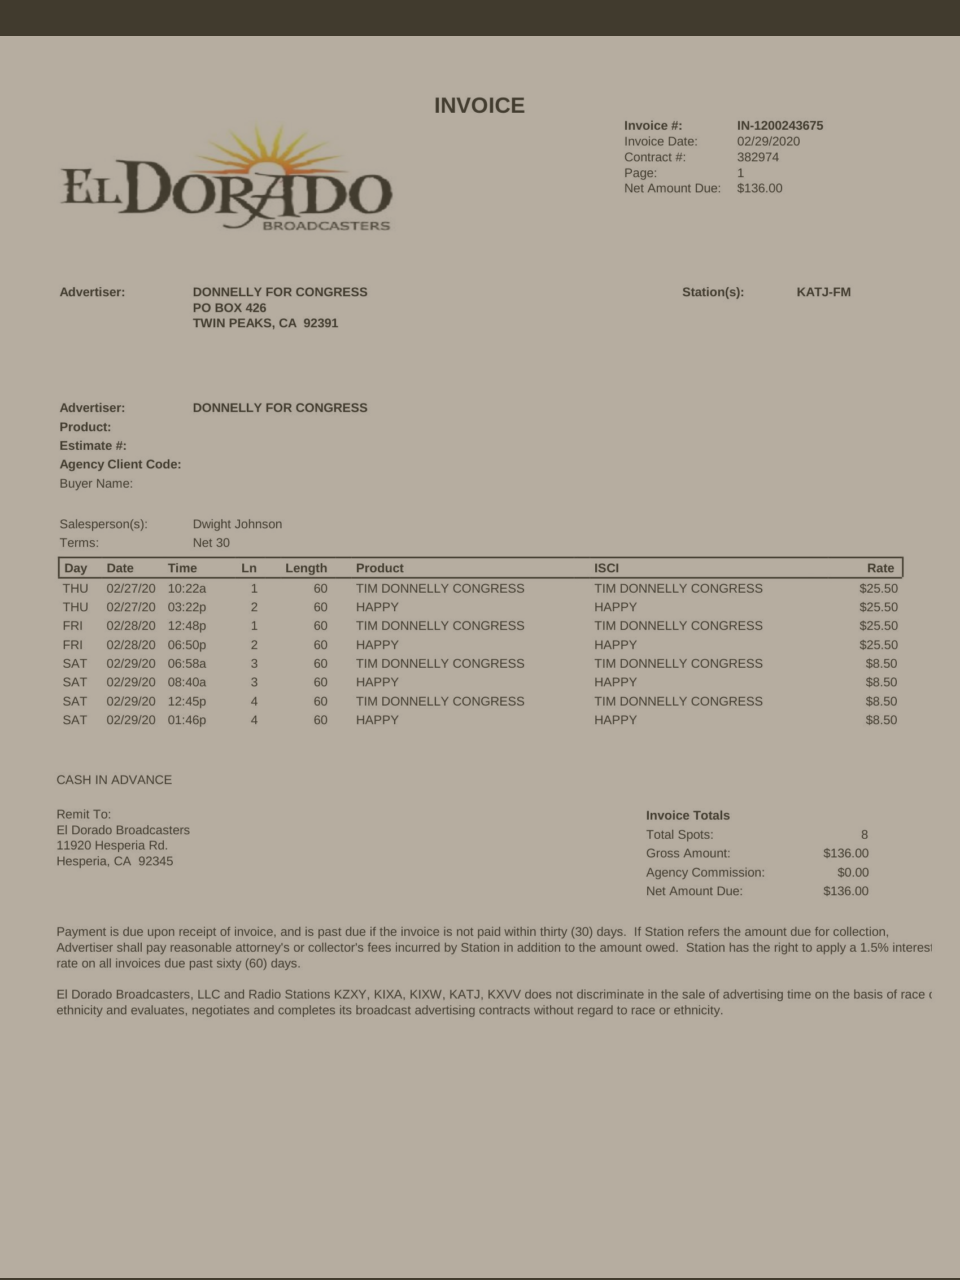

In [21]:
from PIL import Image
import numpy as np

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# unnormalize
reconstructed_image = (batch['pixel_values'][0] * torch.tensor(std)[:, None, None]) + torch.tensor(mean)[:, None, None]
# unrescale
reconstructed_image = reconstructed_image * 255
# convert to numpy of shape HWC
reconstructed_image = torch.moveaxis(reconstructed_image, 0, -1)
image = Image.fromarray(reconstructed_image.numpy().astype(np.uint8))
image

## Train the model 

In [22]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s_docile>'])[0]

In [23]:
# sanity check
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <s_docile>


In [26]:
import torch
from tqdm.auto import tqdm

epochs = 30

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(epochs):
    print("Epoch:", epoch+1)  
    model.train()
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]
        #print(pixel_values)
        #print(labels)
        outputs = model(pixel_values=pixel_values,
                        labels=labels)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 500 == 0:
            print("Loss:", loss.item())
    if (epoch+1) % 10 == 0:
        model.push_to_hub("ZaNioxX/DocILE_" + str(epochs) + "_10_5_ImageClassification_donut_" + str(epoch+1) + "epochs", private=True)

Epoch: 1


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 2.5427610874176025
Loss: 0.19437067210674286
Loss: 0.05194909870624542
Loss: 0.0024114956613630056
Loss: 0.008880972862243652
Loss: 0.033991504460573196
Loss: 0.0008120469283312559
Loss: 0.0008289748802781105
Loss: 0.04233209788799286
Loss: 0.002843850292265415
Epoch: 2


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.005980957765132189


KeyboardInterrupt: 

## evaluate

In [24]:
import torch
from tqdm.auto import tqdm
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [25]:
import re

model = VisionEncoderDecoderModel.from_pretrained("ZaNioxX/DocILE_30_10_5_ImageClassification_donut_30epochs")
model.to(device)
model.eval()

epochs = 30
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", split="test")

output_list = []
real = []
accs = []
for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # prepare decoder inputs
    task_prompt = "<s_docile>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    decoder_input_ids = decoder_input_ids.to(device)
    
    # autoregressively generate sequence
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)
    print(seq)
    ground_truth = json.loads(sample["ground_truth"])
    gt = ground_truth["gt_parse"]
    print(gt)
    score = float(seq["class"] == gt["class"])

    accs.append(score)
    real.append(gt["class"])
    output_list.append(seq["class"])

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

  0%|          | 0/3879 [00:00<?, ?it/s]

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/utils.py:1411: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'tax_invoice'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'credit_note'}
{'class': 'tax_invoice'}
{'class': 'credit_note'}
{'class': 'tax_invoice'}
{'class': 'debit_note'}
{'class': 'tax_invoice'}
{'class': 'debit_note'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{

{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'o

{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'o

{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'o

{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'o

{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'order'}
{'class': 'o

{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_

{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_

{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_

{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_order'}
{'class': 'purchase_

{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 'receipt'}
{'class': 're

{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}


{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}


{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}
{'class': 'sales_order'}


{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}


{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}


{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}


{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}


{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'order'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'order'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'clas

{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'sales_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice

{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'ta

{'class': 'order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'clas

{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'purchase_order'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invoice'}
{'class': 'tax_invo

In [85]:
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_pred.npy", output_list)
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_real.npy", real)

## create plots

In [2]:
import numpy as np

In [111]:
epochs = 10
output_list = np.load("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_pred.npy")
real = np.load("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_real.npy")

In [112]:
real = real.tolist()

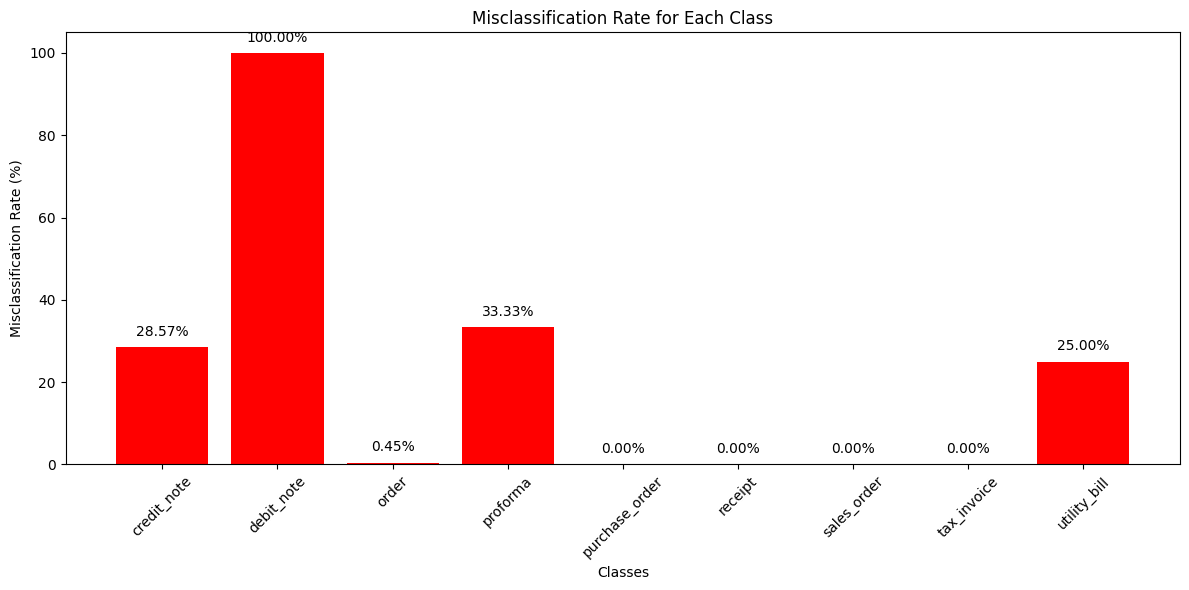

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define the custom order for labels
custom_order = [
  "credit_note",
  "debit_note",
  "order",
  "proforma",
  "purchase_order",
  "receipt",
  "sales_order",
  "tax_invoice",
  "utility_bill"
]


# Create a dictionary to store the counts of each label
label_counts = {label: real.count(label) for label in set(real)}

# Initialize a dictionary to store the count of correct predictions for each label
correct_counts = {label: 0 for label in set(real)}

# Count the correct predictions for each label
for r, o in zip(real, output_list):
    if r == o:
        correct_counts[r] += 1

# Calculate the misclassification rate (percentage of wrong classifications) for each label
misclassification_per_label = {label: (1 - (correct_counts[label] / label_counts[label])) * 100 if label_counts[label] > 0 else 0 for label in custom_order}

# Create a list of labels and corresponding misclassification percentages
labels = [label for label in custom_order]
misclassification_values = [misclassification_per_label[label] for label in custom_order]

# Create a bar plot with custom ordering
plt.figure(figsize=(12, 6))
plt.bar(labels, misclassification_values, color='red')
plt.xlabel('Classes')
plt.ylabel('Misclassification Rate (%)')
plt.title('Misclassification Rate for Each Class')
plt.xticks(rotation=45)

# Display the misclassification percentage above each bar, with adjusted vertical alignment
for i, misclassification in enumerate(misclassification_values):
    plt.text(i, misclassification + 2, f'{misclassification:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/WrongClassification' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()

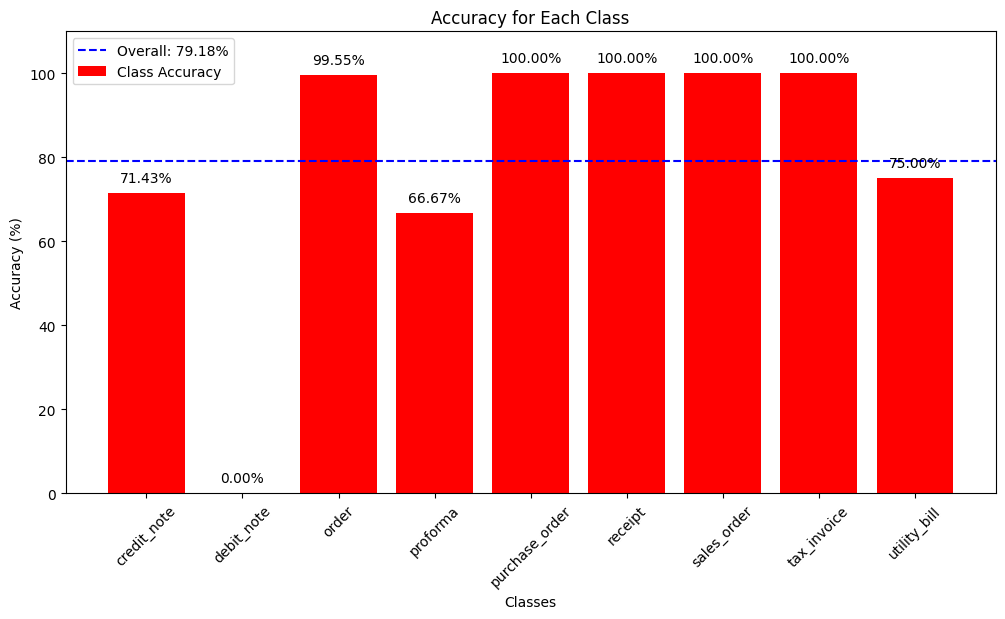

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Define the custom order for labels
custom_order = [
  "credit_note",
  "debit_note",
  "order",
  "proforma",
  "purchase_order",
  "receipt",
  "sales_order",
  "tax_invoice",
  "utility_bill"
]

# Create a dictionary to store the counts of each label
label_counts = {label: real.count(label) for label in set(real)}

# Initialize a dictionary to store the count of correct predictions for each label
correct_counts = {label: 0 for label in set(real)}

# Count the correct predictions for each label
for r, o in zip(real, output_list):
    if r == o:
        correct_counts[r] += 1

# Calculate the misclassification rate (percentage of wrong classifications) for each label
accuracy_per_label = {label: (correct_counts[label] / label_counts[label] * 100) if label_counts[label] > 0 else 0 for label in custom_order}

# Create a list of labels and corresponding misclassification percentages
labels = [label for label in custom_order]
accuracy_values = [accuracy_per_label[label] for label in custom_order]
mean_accuracy = np.mean(accuracy_values)

# Create a bar plot with custom ordering
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracy_values, color='red', label = "Class Accuracy")
plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Overall: {(mean_accuracy/100):.2%}')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Class')
plt.xticks(rotation=45)
plt.ylim(0, 110)
# Display the accuracy percentage above each bar, with adjusted vertical alignment
for i, accuracy in enumerate(accuracy_values):
    plt.text(i, accuracy + 2, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10)

plt.legend()

plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/Accuracy' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png', bbox_inches="tight")
plt.show()

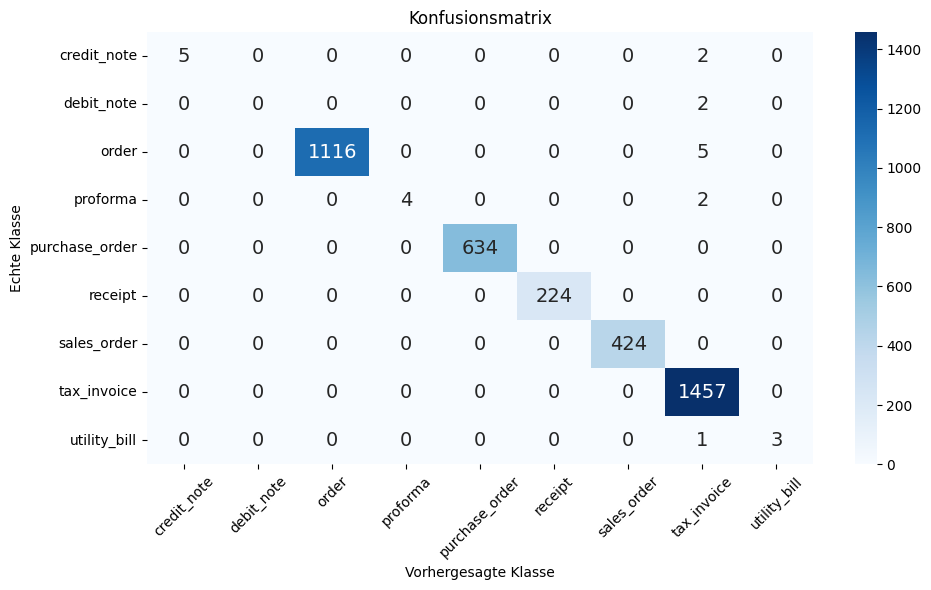

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

font_size = 14  

# Define the label mapping
label_mapping = {'credit_note': 0, 'debit_note': 1, 'order': 2, 'proforma': 3, 'purchase_order': 4, 'receipt': 5, 'sales_order': 6, 'tax_invoice': 7, 'utility_bill': 8}

# Map labels to integers
real_int = [label_mapping[label] for label in real]
output_int = [label_mapping[label] for label in output_list]

# Create the confusion matrix
conf_matrix = confusion_matrix(real_int, output_int)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=list(label_mapping.keys()), columns=list(label_mapping.keys()))

# Plot the confusion matrix using seaborn with x-axis labels rotated
plt.figure(figsize=(10, 6))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g', annot_kws={"size": font_size})
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Echte Klasse')
plt.title('Konfusionsmatrix')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png', bbox_inches="tight")
plt.show()


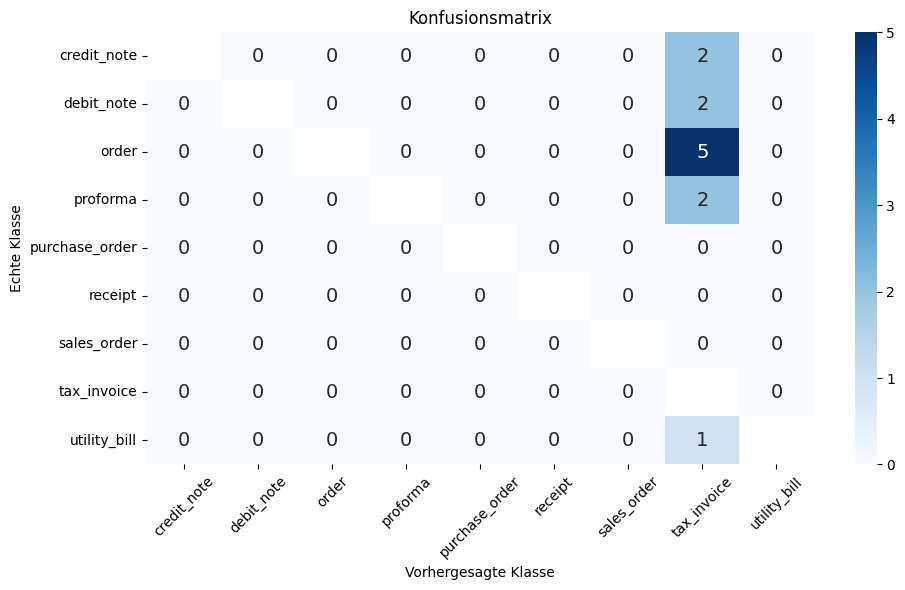

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

font_size = 14  

# Annahme: real und output_list sind vordefiniert
# real = [...]  # Liste der echten Klassen
# output_list = [...]  # Liste der vorhergesagten Klassen

# Define the label mapping
label_mapping = {'credit_note': 0, 'debit_note': 1, 'order': 2, 'proforma': 3, 'purchase_order': 4, 'receipt': 5, 'sales_order': 6, 'tax_invoice': 7, 'utility_bill': 8}

# Map labels to integers
real_int = [label_mapping[label] for label in real]
output_int = [label_mapping[label] for label in output_list]

# Create the confusion matrix
conf_matrix = confusion_matrix(real_int, output_int)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=list(label_mapping.keys()), columns=list(label_mapping.keys()))

# Create a mask for the diagonal values
mask = np.eye(len(label_mapping), dtype=bool)

# Plot the confusion matrix using seaborn with x-axis labels rotated
plt.figure(figsize=(10, 6))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g', annot_kws={"size": font_size}, mask=mask)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Echte Klasse')
plt.title('Konfusionsmatrix')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
#plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png', bbox_inches="tight")
plt.show()


In [117]:
print(conf_df)

                credit_note  debit_note  order  proforma  purchase_order  \
credit_note               5           0      0         0               0   
debit_note                0           0      0         0               0   
order                     0           0   1116         0               0   
proforma                  0           0      0         4               0   
purchase_order            0           0      0         0             634   
receipt                   0           0      0         0               0   
sales_order               0           0      0         0               0   
tax_invoice               0           0      0         0               0   
utility_bill              0           0      0         0               0   

                receipt  sales_order  tax_invoice  utility_bill  
credit_note           0            0            2             0  
debit_note            0            0            2             0  
order                 0            0     

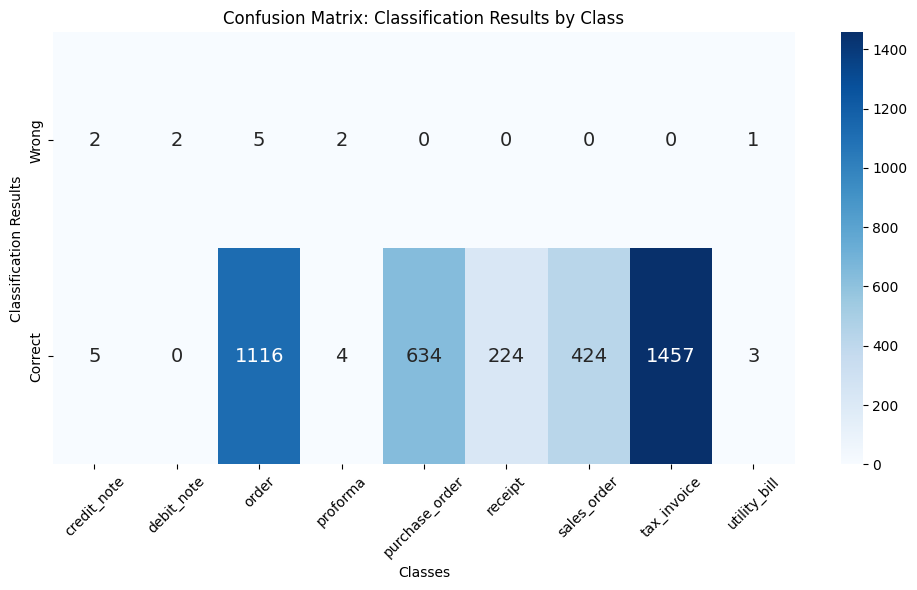

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define categories and data
categories = [
  "credit_note",
  "debit_note",
  "order",
  "proforma",
  "purchase_order",
  "receipt",
  "sales_order",
  "tax_invoice",
  "utility_bill"
]

font_size = 14  

# Calculate the confusion matrix
conf_matrix = np.zeros((2, len(categories)))  # Initialize a matrix for wrong (0) and correct (1) classifications

for i, category in enumerate(categories):
    for r, o in zip(real, output_list):
        if r == category and o == category:
            conf_matrix[1, i] += 1  # Correct classification
        elif r == category and o != category:
            conf_matrix[0, i] += 1  # Wrong classification

# Create a confusion matrix heatmap using Seaborn with switched axes
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=['Wrong', 'Correct'],  annot_kws={"size": font_size})
plt.xlabel('Classes')
plt.ylabel('Classification Results')
plt.title('Confusion Matrix: Classification Results by Class')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_2_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png', bbox_inches="tight")
plt.show()


## calculate metrics

In [119]:
from sklearn.metrics import accuracy_score

# Example predicted and real labels (replace with your actual data)
predicted_labels = output_list
real_labels = real

class_accuracies = []
for class_label in categories:
    class_indices = [i for i, label in enumerate(real_labels) if label == class_label]
    class_predicted = [predicted_labels[i] for i in class_indices]
    class_real = [real_labels[i] for i in class_indices]
    class_accuracy = accuracy_score(class_real, class_predicted)
    class_accuracies.append(class_accuracy)

# Print accuracy for each class
for class_label, class_accuracy in zip(categories, class_accuracies):
    print(f"Accuracy for Class {class_label}: {class_accuracy:.3f}")

Accuracy for Class credit_note: 0.714
Accuracy for Class debit_note: 0.000
Accuracy for Class order: 0.996
Accuracy for Class proforma: 0.667
Accuracy for Class purchase_order: 1.000
Accuracy for Class receipt: 1.000
Accuracy for Class sales_order: 1.000
Accuracy for Class tax_invoice: 1.000
Accuracy for Class utility_bill: 0.750


In [120]:
print(class_accuracies)

[0.7142857142857143, 0.0, 0.9955396966993756, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.75]


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming real and output_list are your true labels and predicted labels

# Calculate accuracy
accuracy = accuracy_score(real, output_list)

# Calculate precision, recall, and F1 score for each class
precision_scores = precision_score(real, output_list, average=None)
recall_scores = recall_score(real, output_list, average=None)
f1_scores = f1_score(real, output_list, average=None)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

categories = [
    "credit_note",
    "debit_note",
    "order",
    "proforma",
    "purchase_order",
    "receipt",
    "sales_order",
    "tax_invoice",
    "utility_bill"
]

# Print precision, recall, and F1 score for each class in the order of categories
for category in categories:
    class_idx = categories.index(category)
    precision = precision_scores[class_idx]
    recall = recall_scores[class_idx]
    f1 = f1_scores[class_idx]

    print(f"Category {category}:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")


Accuracy: 1.00
Category credit_note:
Precision: 1.000
Recall: 0.714
F1 Score: 0.833
Category debit_note:
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
Category order:
Precision: 1.000
Recall: 0.996
F1 Score: 0.998
Category proforma:
Precision: 1.000
Recall: 0.667
F1 Score: 0.800
Category purchase_order:
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Category receipt:
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Category sales_order:
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Category tax_invoice:
Precision: 0.992
Recall: 1.000
F1 Score: 0.996
Category utility_bill:
Precision: 1.000
Recall: 0.750
F1 Score: 0.857


/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x600 with 0 Axes>

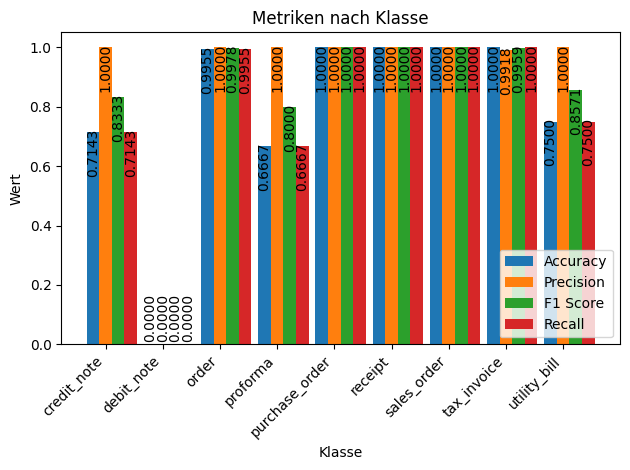

In [123]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Assuming you have defined the variables precision_scores, class_accuracies, f1_scores, recall_scores, and categories

font = {'size': 10}
matplotlib.rc('font', **font)

# values for accuracy, F1 score, and recall for each class
precision_values = precision_scores
accuracy_values = class_accuracies
f1_score_values = f1_scores
recall_values = recall_scores

# Set the width of the bars (increase the bar width for wider bars)
bar_width = 0.22  # Adjust this value for wider bars

# Calculate the x-axis positions for each class
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Create subplots for accuracy, F1 score, and recall
fig, ax = plt.subplots()

# Create wider bars for each metric

bar_accuracy = ax.bar(x - bar_width, accuracy_values, width=bar_width, label='Accuracy')  # Adjusted x-coordinates
bar_precision = ax.bar(x, precision_values, width=bar_width, label='Precision')
bar_f1_score = ax.bar(x + bar_width, f1_score_values, width=bar_width, label='F1 Score')
bar_recall = ax.bar(x + 2*bar_width, recall_values, width=bar_width, label='Recall')  # Adjusted x-coordinates

y_ticks = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{tick:.1f}" for tick in y_ticks])

# Set the labels for x-axis and y-axis
ax.set_xlabel('Klasse')
ax.set_ylabel('Wert')
ax.set_title('Metriken nach Klasse')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")

# Display numerical values inside the wider bars vertically and centered
for bars in [bar_accuracy, bar_precision, bar_f1_score, bar_recall]:
    for bar in bars:
        height = bar.get_height()
        bar_height = bar.get_height()
        if bar_height == 0:
            bar_height  = 0.16
            
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, bar_height - 0.07),
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', rotation=90)  # Place text inside the bar vertically

# Move the legend to the bottom right
ax.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/metrics_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png', bbox_inches="tight")
plt.show()
